In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
df = pd.read_csv('twitter_training.csv', header=0, names=column_names)

In [3]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.shape

(74681, 4)

In [5]:
# Count of unique entities
entity_count = df['entity'].value_counts()
print(entity_count)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [6]:
df.info

<bound method DataFrame.info of          ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 comment  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window

In [7]:
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [8]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [10]:
# Dropping missing value [ Using Dropna]
df = df.dropna()

In [11]:
df.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [12]:
# Number of Unique Values
df.nunique()

ID           12447
entity          32
sentiment        4
comment      69490
dtype: int64

Displaying Sample :

In [13]:
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}   ->   {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,   ->   Positive
2: im getting on borderlands and i will kill you all,   ->   Positive
3: im coming on borderlands and i will murder you all,   ->   Positive
4: im getting on borderlands 2 and i will murder you me all,   ->   Positive
5: im getting into borderlands and i can murder you all,   ->   Positive


In [14]:
df['sentiment'].value_counts()

sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

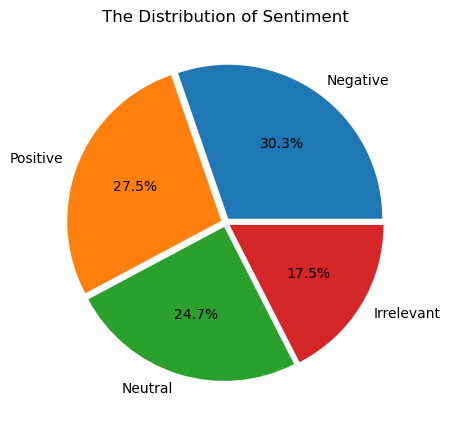

In [15]:
plt.figure(figsize=(10,5))
plt.pie(x=df['sentiment'].value_counts().values, 
        labels=df['sentiment'].value_counts().index, 
        autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

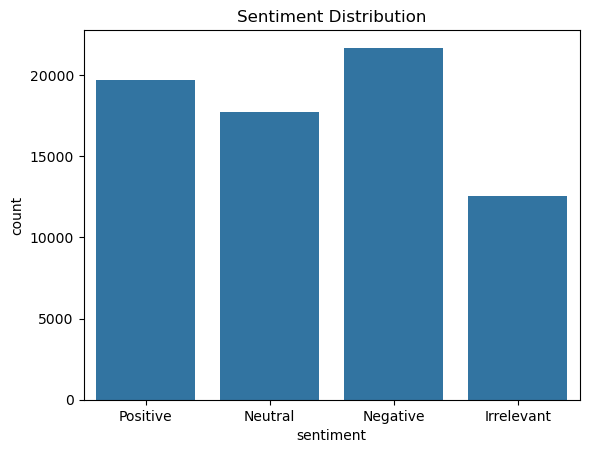

In [16]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

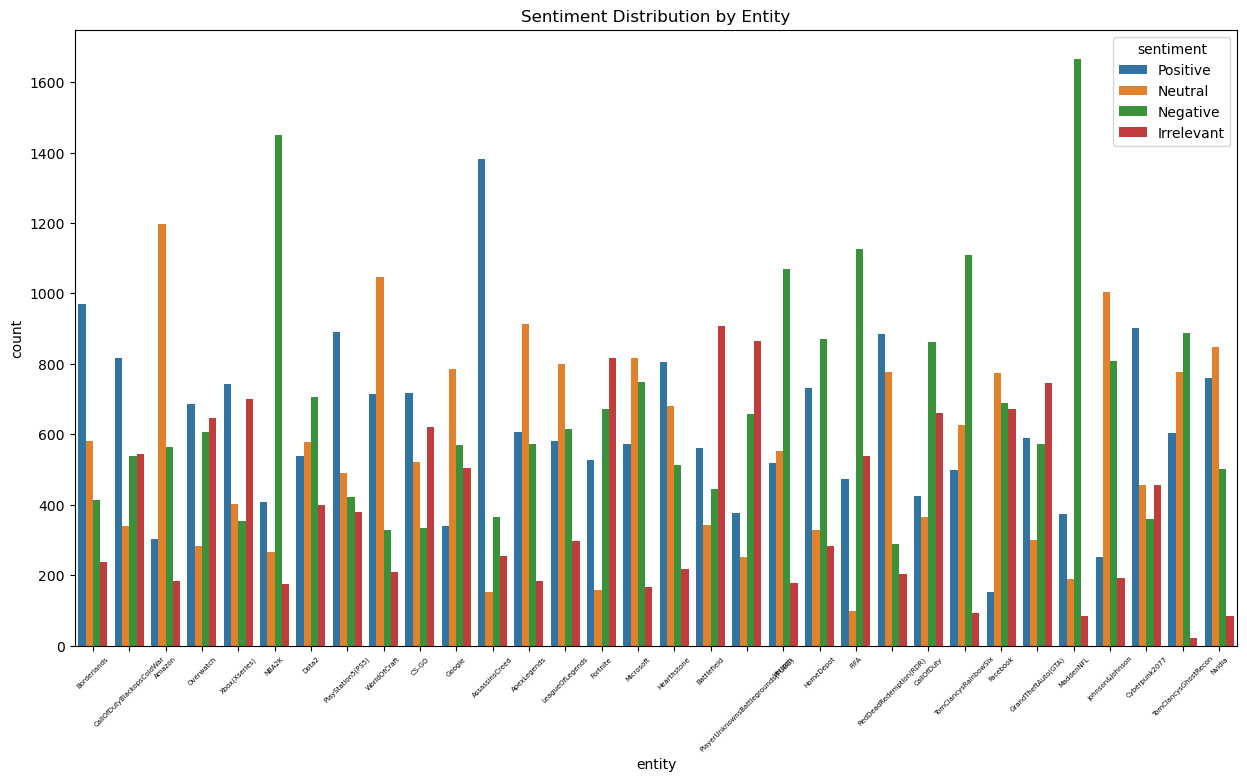

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(x='entity', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

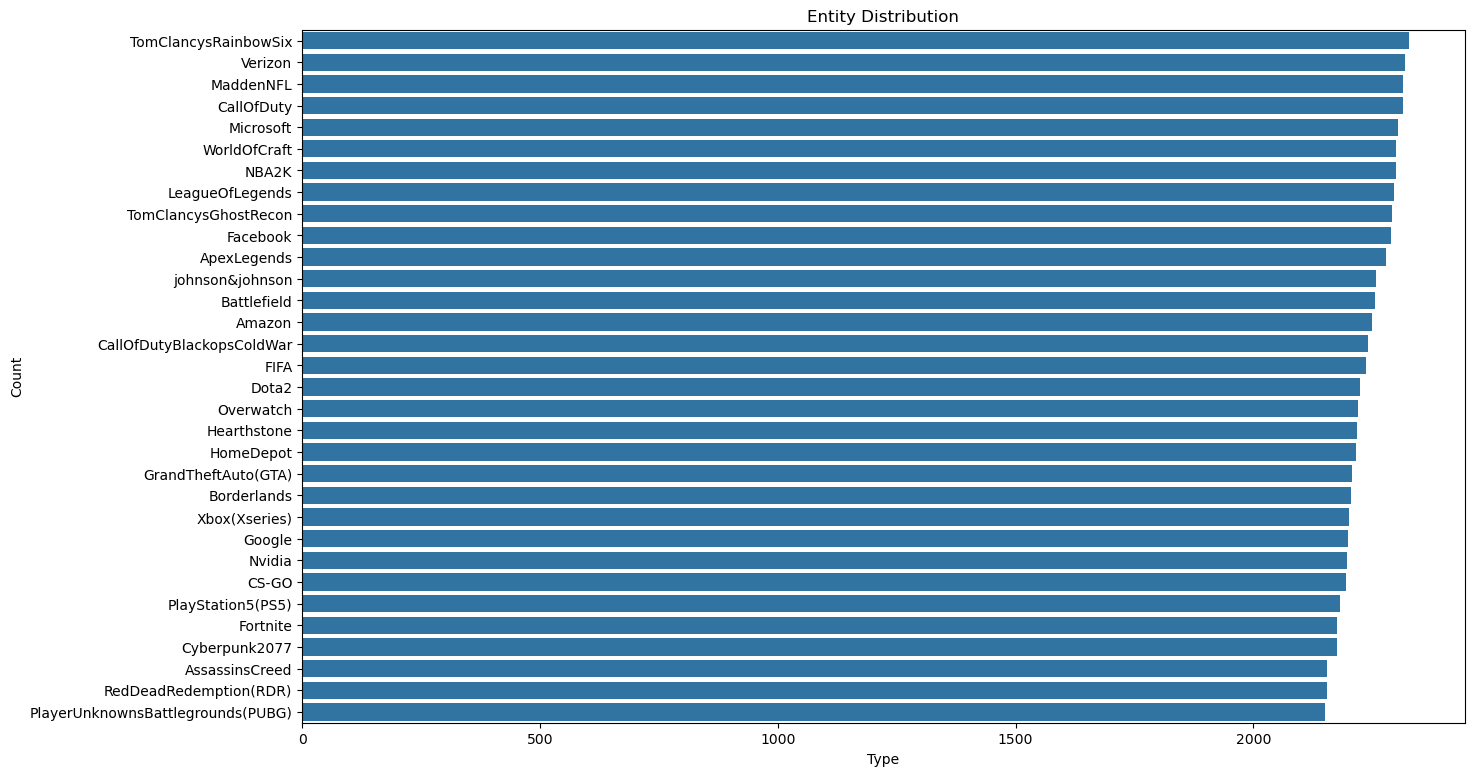

In [18]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['entity'].value_counts().values,y=df['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

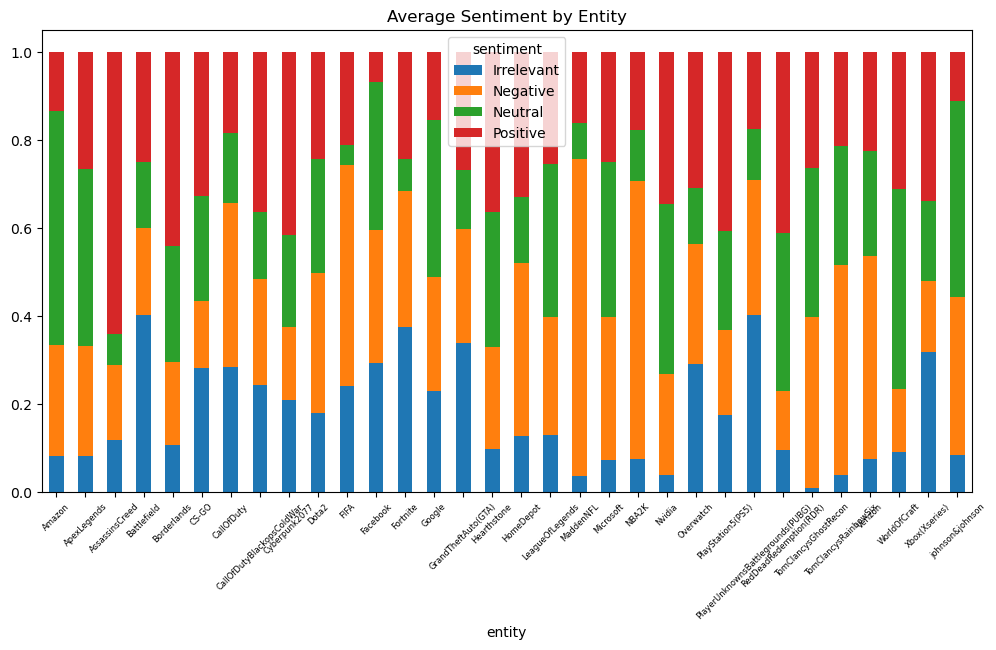

In [19]:
average_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

In [20]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Hp\AppData\Local\Temp\ipykernel_18628\1527591474.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18628\1527591474.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18628\1527591474.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [22]:
df["comment"] = df["comment"].apply(clean)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18628\2097378395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["comment"] = df["comment"].apply(clean)


In [23]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [27]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 495.5 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
from wordcloud import wordcloud,STOPWORDS
wc = wordCloud(width=800,height=500,min_font_size=10,background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [34]:
from PIL import Image, ImageDraw, ImageFont

In [35]:
positive_data = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

NameError: name 'WordCloud' is not defined

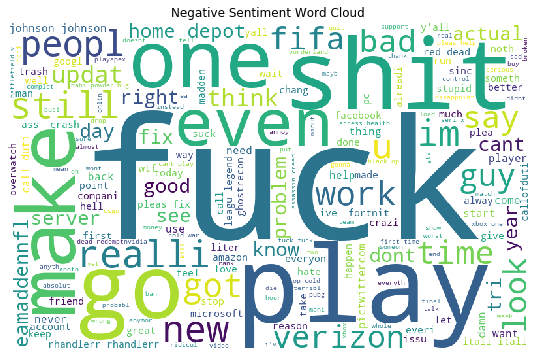

In [31]:
negative_data = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

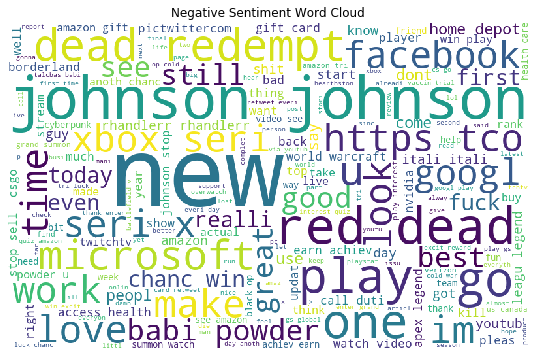

In [30]:
neutral_data = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

In [36]:
irrelevant_data = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")


NameError: name 'WordCloud' is not defined